Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 05 - Beginning Matplotlib

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.

In [2]:
# Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Get the version of matplotlib
matplotlib.__version__

'3.7.1'

In [4]:
# Load the data
# This is the data we previously saved from the Pandas notebook
#   4.  Beginning Pandas
df_conn = pd.read_csv(r'df_conn_cleaned.csv')
df_conn

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4430178,4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430179,4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430180,4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430181,4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40



This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [5]:
# Uh oh, we seem to have two set of indexes above
# Let's reread the dataset and ignore that additional index
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


Awesome! With the dataset in place, time to visualize using  graphing tools.  <br>
Note, from my perspective, whether you use pandas plotting functions or matplotlib, seaborn or some other tool, <br>
none of it matters.
What does matter, is that you are able to present your ideas via visualization. <br>
What does matter is how you are able to convey your message. <br>
You know what they say, a picture tells a thousand stories or is ia a million ;-)  

In [6]:
# Set the plot style to use
plt.style.use('classic')

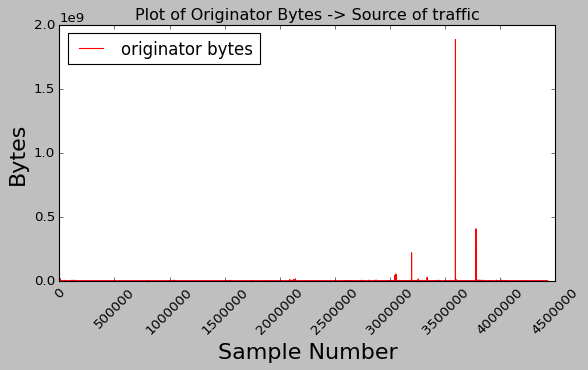

In [7]:
# Setup a figure with width of 8 and height of 4 inches
# We can clearly see below the significant spikes in the originator bytes
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_fontdict.html
plt.figure(figsize=(8,4))

# Specify a title
plt.title('Plot of Originator Bytes -> Source of traffic')

# Plot the originator bytes, give it a colour of red and a label
plt.plot(df_conn['orig_bytes'], color='red', label='originator bytes')

# Add a label to the X-axis
plt.xlabel(xlabel='Sample Number', fontdict={'size':20})

# Because the xlabels can seem clustered, make it clearer to read by changing the angle
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel(ylabel='Bytes', fontdict={'size':20})

# Tell Matplotlib to choose the best location to place the legend. 
# Set the font to size 15
plt.legend(prop={'size':15}, loc='best')

plt.show()

In [8]:
# Looking at above, it looks like somewhere around that 3500 mark, we have the largest spike.
# We should take a look at that communication to see what's up.
# We see the bytes on the y-axis os almost at 2 and the range goes from 0 to 1e9
# 1e9 is equal to 1000000000.0
# Let's run a search for the particular records that are greater that 1.5e9
df_conn[df_conn.orig_bytes > 1.5e9]


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
3593490,192.168.0.29,56757,141.117.126.40,443,0.306014,1882412858,31183,10,1055,31,28051


In [9]:
# Alternatively, if somehow we new the record number and wanted to take a closer look, we can leverage our pandas skills
#   04 - Beginning Pandas

# Grabbing that one record
df_conn.loc[3593490]

id.orig_h          192.168.0.29
id.orig_p                 56757
id.resp_h        141.117.126.40
id.resp_p                   443
duration               0.306014
orig_bytes           1882412858
resp_bytes                31183
orig_pkts                    10
orig_ip_bytes              1055
resp_pkts                    31
resp_ip_bytes             28051
Name: 3593490, dtype: object

Rather than plotting one column <br>
Looking at the orig_bytes and resp_bytes  <br>
This view at least allows us to compare.  <br>
We can see generally, the responder bytes are greater than the originator bytes <br>
However, we do have some instances, where the originator bytes is greater than the originator  <br>
Note, scaling is more than likely also to give us a better view of the data from the perspective of the axis  <br>
We look at scaling in notebook <br>
&emsp; 06 - Beginning Data Scaling <br>

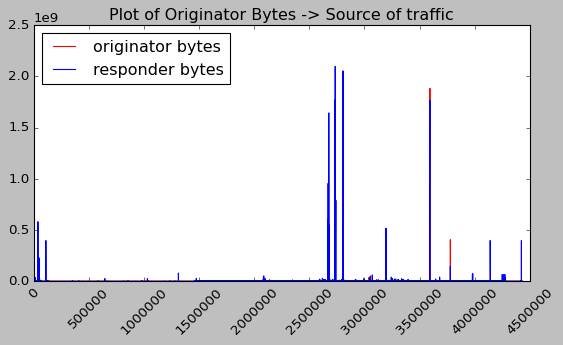

In [10]:
# Setup a figure with width of 8 and height of 4 inches
plt.figure(figsize=(8,4))

# Specify a title
plt.title('Plot of Originator Bytes -> Source of traffic')
plt.plot(df_conn['orig_bytes'], color='red', label='originator bytes')
plt.plot(df_conn['resp_bytes'], color='blue', label='responder bytes')

plt.xticks(rotation=45)

# Tell Matplotlib to choose the best location to place the legend
plt.legend(loc='best')

Plotting a scatter plot of these <br>
Set the size of the markers based on the number of packets<br>
In this case, we are multiplying each item in this column by 0.005. <br>
0.005 is just arbitrary to fit this scenario <br>

If you are paying attention, and if we go back to our correlation matrix in <br>
&emsp; 04 - Beginning Pandas

We should recognize a positive relationship here<br>
As the number of packets from the originator increases, the packets from the responder increases<br>
As in as X increases, y increases, hence a positive linear relationship

Text(0, 0.5, 'Responder Packets')

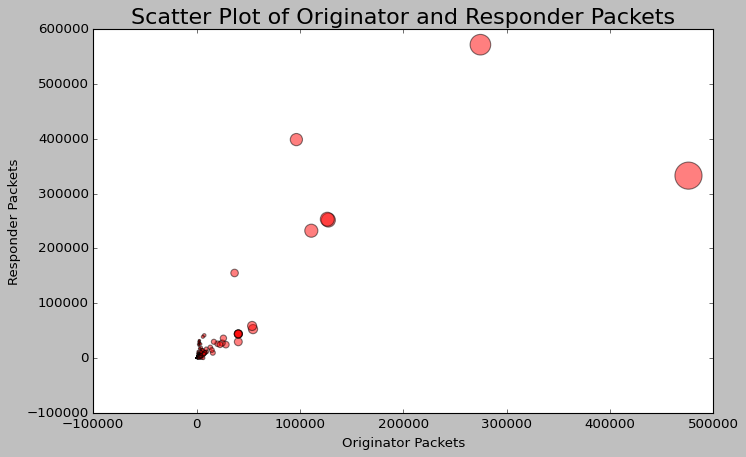

In [11]:
# Plot a scatter plot of the originator and responder packets
plt.figure(figsize=(10,6))
plt.title('Scatter Plot of Originator and Responder Packets', fontdict={'size':20})
plt.scatter(x=df_conn['orig_pkts'], y=df_conn['resp_pkts'],
            marker='.', color='r', s=df_conn.orig_pkts * 0.005, alpha=0.5, edgecolors='black')
plt.xlabel('Originator Packets')
plt.ylabel('Responder Packets')

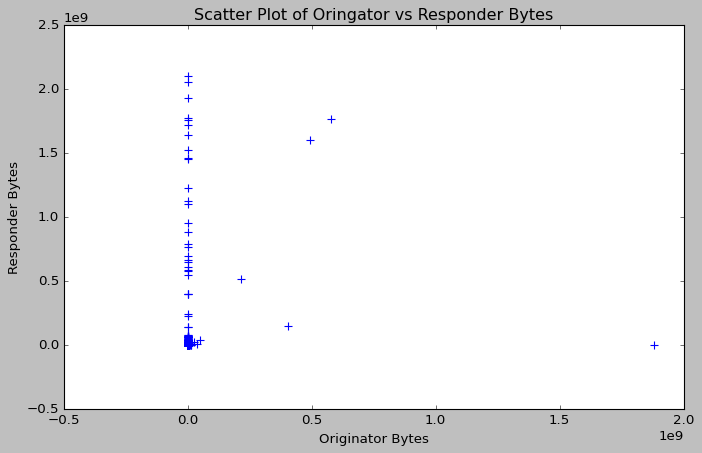

In [12]:
# Re-plot but change the 
plt.figure(figsize=(10,6))
plt.title('Scatter Plot of Oringator vs Responder Bytes')

# Notice the maker='+'
plt.scatter(x=df_conn['orig_bytes'], y=df_conn['resp_bytes'], marker='+', s=50, c='b', alpha=1)
plt.xlabel('Originator Bytes')
plt.ylabel('Responder Bytes')

# Notice in this example, I am using plt.show()
# I don't have to, as the last value in the cell would be returned
# However, for good practice, you should
plt.show()

Text(0.5, 0, 'Responder IP Bytes')

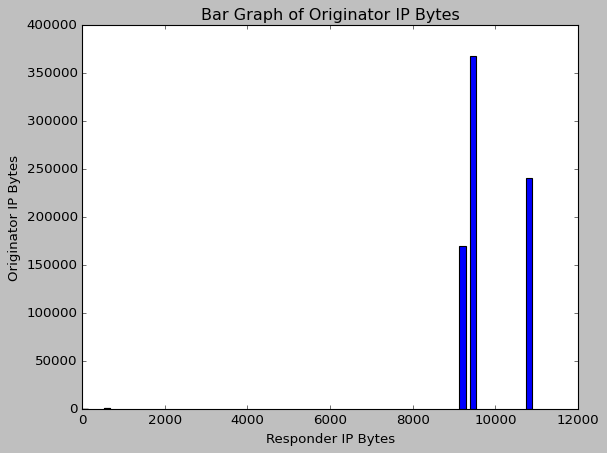

In [13]:
# Plot a bar graph graph of the first 10 records
# Running this with all the records takes a while on my device
plt.title('Bar Graph of Originator IP Bytes')
plt.bar(x=df_conn.orig_ip_bytes[:10], height=df_conn.resp_ip_bytes[:10], width=150, align='edge', log=False)
plt.ylabel('Originator IP Bytes')
plt.xlabel('Responder IP Bytes')

In [ ]:
# Definitely if you use see those 3 bars above in your dataset, 
# you should be looking to understand what is going on there

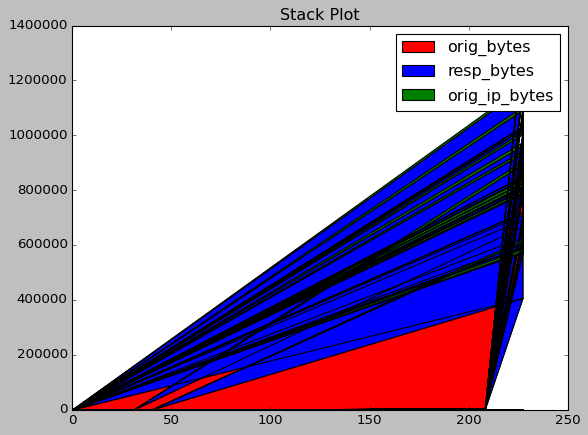

In [14]:
# Plot a stack plot
# For this dataset, the stackplot does not really convey my message. 
# However, I leave it in for someone who wishes to try it out
plt.title('Stack Plot')
plt.stackplot( df_conn['orig_bytes'][:100], df_conn['resp_bytes'][:100], 
              df_conn['resp_ip_bytes'][:100], df_conn['orig_ip_bytes'][:100],  
              colors=['red', 'blue', 'green', 'yellow'], labels=['orig_bytes', 
                                                                 'resp_bytes', 'orig_ip_bytes', 'resp_ip_bytes'] )
plt.legend()
plt.show()

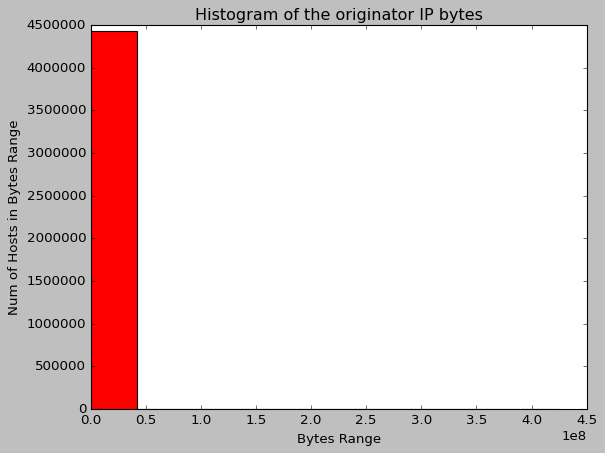

In [15]:
# Plot a histogram
# From below, we see the majority of the records, almost 4,500,000 is within that first bin
# We can however see, there is data further on the x-axis
# Well we don't see it clearly but because of the numbers, we know there is data there
plt.title('Histogram of the originator IP bytes')
plt.hist(df_conn.orig_ip_bytes, bins=10, density=False, color='red', ec='black')
plt.xlabel('Bytes Range')
plt.ylabel('Num of Hosts in Bytes Range')
plt.show()

Customizing the bins so we can see the additional data. <br>
Highlighting the records with values between  100,000 (1e5) and 100,000,000 (1e8)<br>
We see below, we were able to bring up the values on the right end of the graph above<br>
At this point, it looks like we have about 450 records with values between 100,000 (1e5) <br>
and 100,000,000 (1e8) originator IP bytes<br><br>

If we wanted, we can go back to the pandas notebook and run <br>
df_conn[ ( df_conn.orig_ip_bytes > 100000) & ( df_conn.orig_ip_bytes < 100000000 ) ] <br>
The above would validate the results below.<br>
   
If we run this one below, <br>
       df_conn[df_conn.orig_ip_bytes > 100000] <br>
We would see 2 extra records returned. <br>
These extra two records would be even more anomalous than what we are seeing below here <br>

Anyhow, this notebook is about Matplotlib. <br>
You can go back to pandas and experiment more if you wish. <br>
Remember, we learned about Pandas in notebook <br>
&emsp; 04 - Beginning Pandas 

Text(0, 0.5, 'Num of Hosts in Bytes Range')

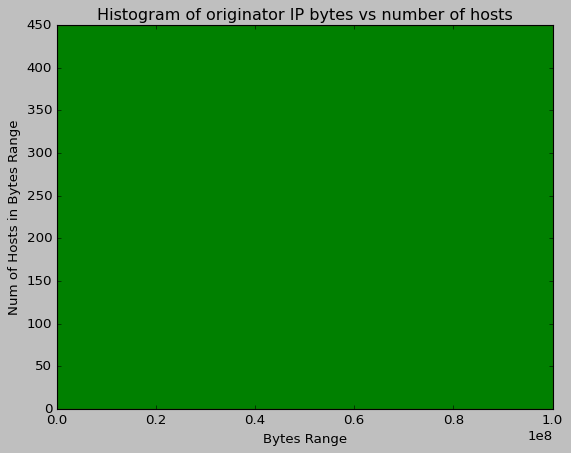

In [16]:
# Plotting the histogram with the adjusted bins shows about 450 records returned within that byte range
plt.title('Histogram of originator IP bytes vs number of hosts')
plt.hist(df_conn.orig_ip_bytes, bins=[1e5, 1e8], density=False, color='green', ec='red', 
         cumulative=True, histtype='stepfilled', log=False)
plt.xlabel('Bytes Range')
plt.ylabel('Num of Hosts in Bytes Range')

In [17]:
# Visualizing the mean of a few features via pie hart
# First setup the labels for the pie chart
pie_labels = [ 'orig_bytes', 'resp_bytes', 'orig_ip_bytes', 'resp_ip_bytes' ]

colors = ['red', 'black', 'yellow', 'green']

# Setup the explode
explodes = [0.1, 0.1, 0.1, 0.1]

# Setup the sizes based on the mean
pie_means = [ df_conn['orig_bytes'].mean(), df_conn['resp_bytes'].mean(), \
             df_conn['orig_ip_bytes'].mean(), df_conn['resp_ip_bytes'].mean() ]

# Setup the sizes as a percentage of pie_means
pie_sizes = [ round((i / sum(pie_means) * 100),2) for i in pie_means ]

# show the array with the values as well as the total sum being equal to 100%
pie_sizes, sum(pie_sizes)

([5.05, 74.23, 1.72, 19.0], 100.0)

In [18]:
# Let's see the stylesheets that are available
# Reference:
#   https://matplotlib.org/stable/tutorials/introductory/customizing.html
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


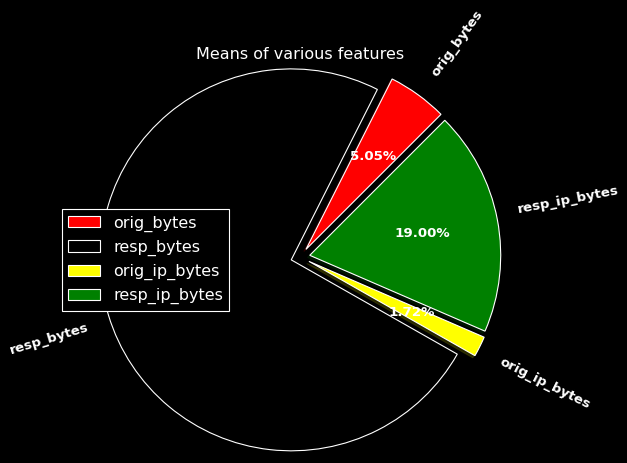

In [19]:
# Build the subplot to look at the mean
# Clearly below it shows the mean of the resp_bytes is significantly larger than everything else

plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.pie(x=pie_sizes, explode=explodes, labels=pie_labels, shadow=True, startangle=45, 
       autopct='%1.2f%%', radius=2, rotatelabels=True, colors=colors, \
              textprops={'color' : 'white', 'weight':'bold'})
ax.axis('equal')
ax.set_title('Means of various features')
plt.legend(loc='best')
fig.tight_layout()

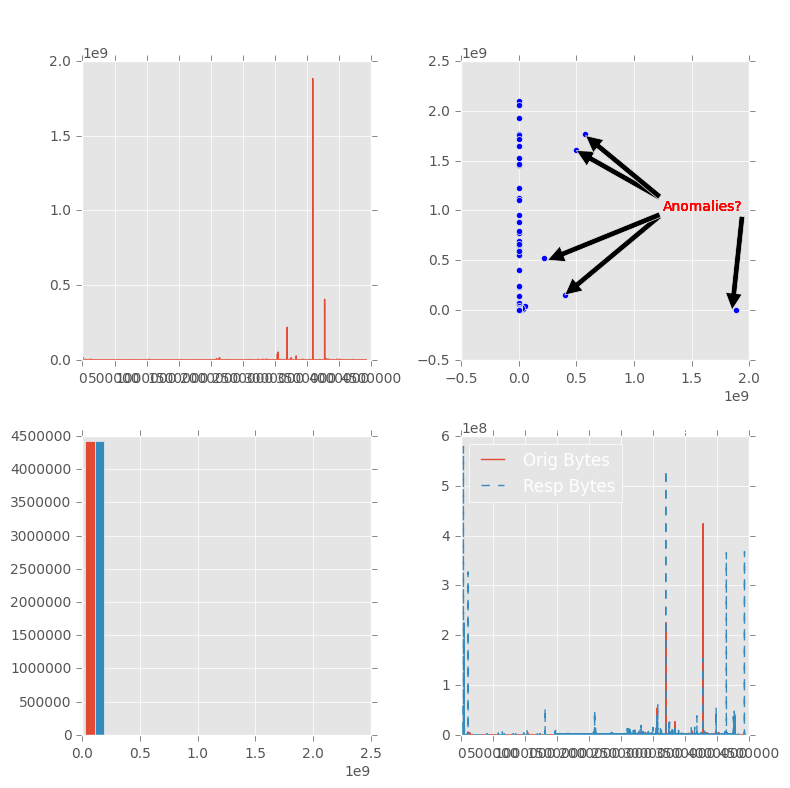

In [20]:
# Above, we used the subplots
# Let's build on this a bit more

# Let's setup a 2 x 2 subplot
plt.style.use('ggplot')
fig1, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), dpi=100, \
                          sharex=False, sharey=False, squeeze=True) 

# Set the title for the overall figure
plt.suptitle(t='2x2 subplots of originator and responder bytes', fontsize=15)

# Access the top left area
# Create a normal plot of the originator bytes
axes[0][0].plot(df_conn['orig_bytes'])
# Set the title for this individual chart
axes[0][0].set_title(label='Plot of Originator Bytes', fontsize=10)

# Access the top right area
axes[0][1].scatter(df_conn['orig_bytes'], df_conn['resp_bytes'])
# Set the title for this individual chart
axes[0][1].set_title(label='Orig vs Resp Bytes', fontsize=10)

# While we are here, let's anonate this plot
axes[0][1].annotate(text='Anomalies?', xy=(0.50e9, 1.6e9), xycoords='data', xytext=(1.25e9, 1.0e9), 
                    arrowprops=dict(facecolor='black'), color='red' )
axes[0][1].annotate(text='Anomalies?', xy=(0.58e9, 1.75e9), xycoords='data', xytext=(1.25e9, 1.0e9), 
                    arrowprops=dict(facecolor='black'), color='red' )
axes[0][1].annotate(text='Anomalies?', xy=(1.85e9, 0.00e9), xycoords='data', xytext=(1.25e9, 1.0e9), 
                    arrowprops=dict(facecolor='black'), color='red' )
axes[0][1].annotate(text='Anomalies?', xy=(0.4e9, 0.15e9), xycoords='data', xytext=(1.25e9, 1.0e9), 
                    arrowprops=dict(facecolor='black'), color='red' )
axes[0][1].annotate(text='Anomalies?', xy=(0.25e9, 0.5e9), xycoords='data', xytext=(1.25e9, 1.0e9), 
                    arrowprops=dict(facecolor='black'), color='red' )

# Access the bottom left area
axes[1][0].hist((df_conn['orig_bytes'], df_conn['resp_bytes']))
# Set the title for this individual chart
axes[1][0].set_title(label='Histogram - orig vs resp bytes', fontsize=10)

# Access the bottom right area
axes[1][1].set_title(label='Line Graph orig and resp bytes', fontsize=10)
axes[1][1].plot(df_conn['orig_ip_bytes'], label='Orig Bytes')
axes[1][1].plot(df_conn['resp_ip_bytes'], label='Resp Bytes', linestyle='--')
axes[1][1].legend(loc='best')
# Set the title for this individual chart

# Address concerns with text overlapping
plt.tight_layout()

In [21]:
# Maybe after performing all you needed to with Matplotlib
# you decide to save the figures to share.
# First find the extension you wish to use
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

In [22]:
# Save the file
fig1.savefig(fname='matplotlib-demo.jpg', format='jpg', dpi=100)

In [23]:
# show the file has been saved
!dir /b matplotlib-demo.jpg

matplotlib-demo.jpg


In [24]:
# Import the libraries to load the image
from IPython.display import Image

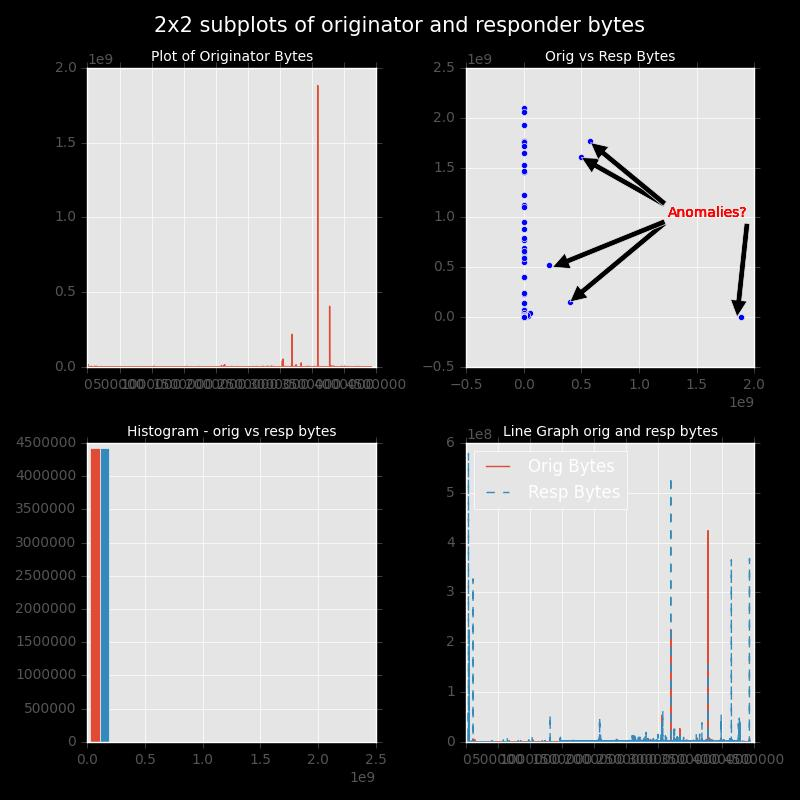

In [25]:
# Load the saved image
Image(data='matplotlib-demo.jpg')

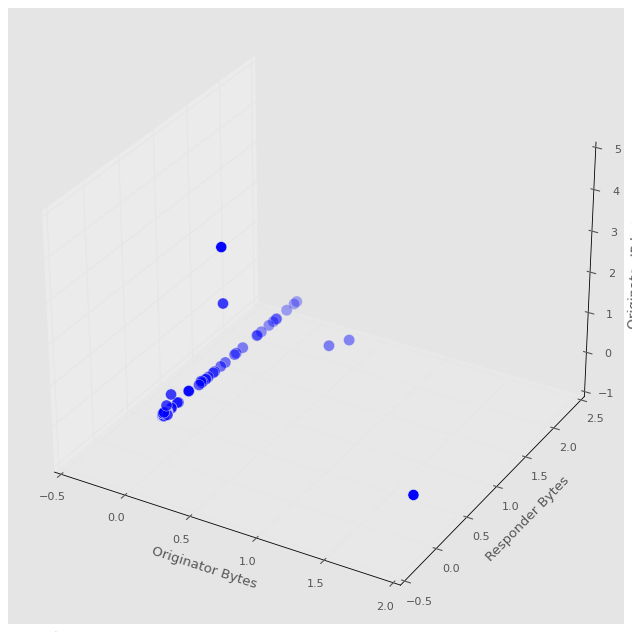

In [26]:
# Let's plot a 3d image of orig_pkts, vs resp_pkts vs orig_bytes
# Sometimes a 3D view is good to give you a different perspective
# Obviously, we have to have 3 features in order to plot this 3D graph
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=df_conn['orig_bytes'], ys=df_conn['resp_bytes'], zs=df_conn['orig_ip_bytes'], s=100)
ax.set_xlabel('Originator Bytes')
ax.set_ylabel('Responder Bytes')
ax.set_zlabel('Originator IP bytes')
plt.tight_layout()

In [27]:
# While Matplotlib is cool, you may instead like other tools such as Seaborn
# import seaborn
import seaborn as sns

In [28]:
# Get the shape of the dataset
# The idea here is to show the 11 features, as below we use a subset of these for the 3D plot
df_conn.shape

(4430183, 11)

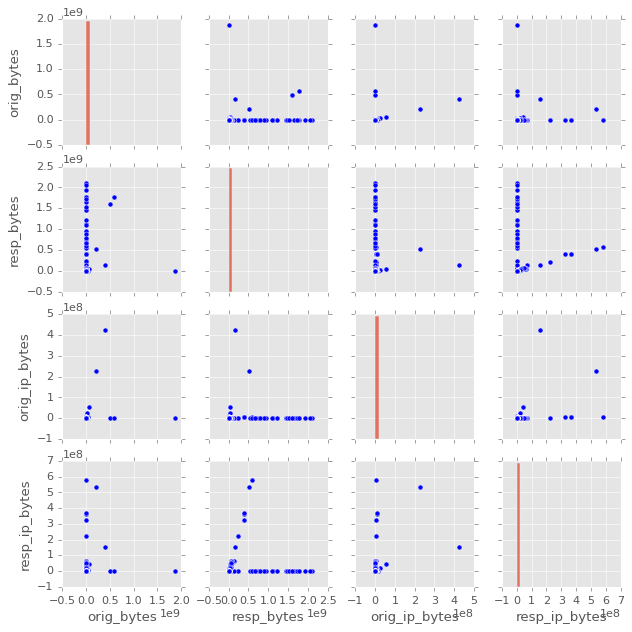

In [29]:
# Get a pairplot from Seaborn
# Note, the larger the number of features, the longer you should expect plotting this to take
# Let's take a subset of our features.
# Basically 4 of the 11 features
sns.pairplot(data=df_conn[['orig_bytes', 'resp_bytes', 'orig_ip_bytes', 'resp_ip_bytes']], 
             diag_kind='hist', height=2, corner=False)

There is a lot more that can be done from the perspective of visualization. <br>
Ultimately, you will have to decide when to stop visualizing.  <br>
For this notebook, let's stop here as we will use visualization constantly through the rest of this series. <br>. 
Therefore, lots of opportunities to do different things <br>

Additional References and good reads/videos <br>: 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html <br>
https://faculty.kutztown.edu/earl/teaching/2020-2021/223-adv-sci-program/slides/matplotlib.html#/line-color <br>
https://faculty.kutztown.edu/earl/teaching/2021-2022/223-adv-sci-program/slides/matplotlib.html#2  <br>
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html  <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html <br>
https://realpython.com/visualizing-python-plt-scatter/ <br>
https://matplotlib.org/stable/gallery/statistics/hist.html  <br>
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  <br>
https://mldoodles.com/matplotlib-pie-chart/  <br>
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html  <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html   <br>
https://matplotlib.org/stable/tutorials/introductory/customizing.html  <br>
https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips  <br>
https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py  <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html  <br>
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py  <br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html